# **Color Enhancement**

* As a photographer working with a landscape series, I want to automatically enhance the colors and contrast of my photos, So that I can make the images more vivid and visually striking, bringing out the true beauty of the scenery.
* This user story focuses on color enhancement techniques. You should take the provided image and apply two different enhancement methods:
1. **Contrast Enhancement:** You should implement histogram equalization. You can perform this on the grayscale version of the image or on the V-channel of the HSV color space to enhance the overall brightness and contrast without affecting the hue.
2. **Saturation Enhancement:** You should increase the saturation of the image. This can be done by converting the image to the HSV (Hue, Saturation, Value) color space, multiplying the Saturation channel by a factor (e.g., 1.5), and then converting the image back to RGB. You should handle potential value clipping (values exceeding 255) to avoid unwanted artifacts.

# **Importing Libraries**

In [1]:
import cv2
import time
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# **Web Scraping Zealand Image**

In [8]:
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                  'AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/120.0.0.0 Safari/537.36'
}

# Direct file URL (full-resolution image)
image_url = "https://upload.wikimedia.org/wikipedia/commons/9/97/Typical_New_Zealand_scenic_walk_view.jpg"

# Download
r = requests.get(image_url, headers=headers)

with open("scenic_walk.jpg", "wb") as f:
    f.write(r.content)

print("Image saved as scenic_walk.jpg")


Image saved as scenic_walk.jpg


# **Loading The Zealand Image**

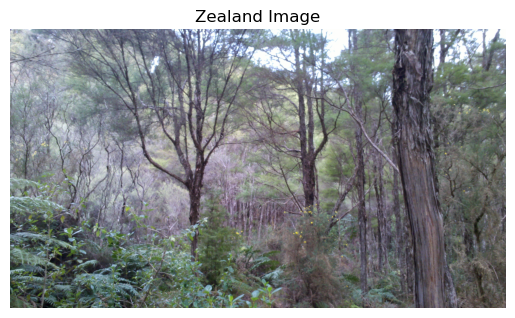

In [12]:
# Loading the image in BGR format using OpenCV.
zealand_image_bgr =cv2.imread(r"C:\Users\bbuser\Downloads\scenic_walk.jpg")

# Converting BGR to RGB for correct color display in matplotlib.
zealand_image_rgb = cv2.cvtColor(zealand_image_bgr, cv2.COLOR_BGR2RGB)

# Displaying the image.
plt.imshow(zealand_image_rgb) # Showing RGB image.
plt.title("Zealand Image")  # Adding a title.
plt.axis("off")  # Hiding the axes.
plt.show()  # Displaying the image.

# **Converting The Image To Grayscale**

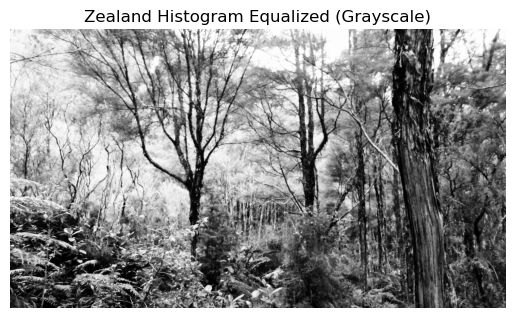

In [11]:
# Convert to grayscale
gray = cv2.cvtColor(zealand_image_rgb, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_gray = cv2.equalizeHist(gray)

plt.imshow(equalized_gray, cmap='gray')
plt.title("Zealand Histogram Equalized (Grayscale)")
plt.axis('off')
plt.show()

# **Contrast Enhancement**

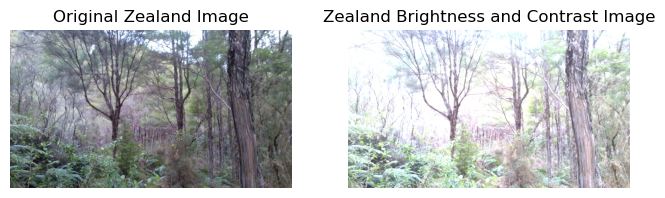

In [13]:
alpha = 1.5  # Contrast control (1.0 = no change)
beta = 50    # Brightness control (0 = no change)

# Apply transformation using OpenCV (scales, clips, and converts image)
zealand_bright_contrast_image = cv2.convertScaleAbs(zealand_image_rgb, alpha=alpha, beta=beta)

# Show before and after adjustments
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(zealand_image_rgb)
plt.title("Original Zealand Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(zealand_bright_contrast_image)
plt.title("Zealand Brightness and Contrast Image")
plt.axis('off')
plt.show()

# **Saturation Enhancement**

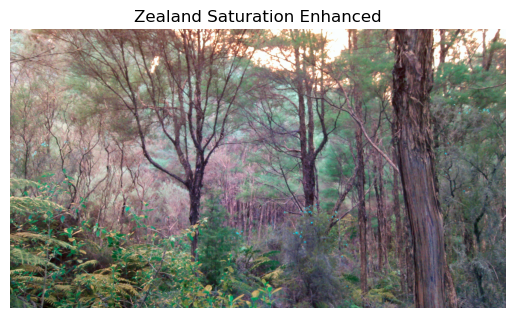

In [14]:
# Convert to HSV
hsv = cv2.cvtColor(zealand_image_rgb, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# Increase saturation by 1.5x
s = np.clip(s * 1.5, 0, 255).astype(np.uint8)  # Clip to avoid overflow

# Merge back and convert to RGB
hsv_saturated = cv2.merge([h, s, v])
saturation_enhanced = cv2.cvtColor(hsv_saturated, cv2.COLOR_HSV2RGB)

plt.imshow(saturation_enhanced)
plt.title("Zealand Saturation Enhanced")
plt.axis('off')
plt.show()